# Homework 6, Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import collections

Questions to answer:

- 2009 Iranian election MSE: ___
- Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: ___
- Quantity of MSEs smaller than the 2009 Iranian election MSE: ___
- 2009 Iranian election null hypothesis rejection level p: ___
- 2008 United States election MSE: ___
- Quantity of MSEs larger than or equal to the 2008 United States election MSE: ___
- Quantity of MSEs smaller than the 2008 United States election MSE: ___
- 2008 United States election null hypothesis rejection level p: ___

Functionsn to write:

- extract_election_vote_counts(filename, column_names)
- ones_and_tens_digit_histogram(numbers)
- plot_iranian_least_digits_histogram(histogram)
- plot_distribution_by_sample_size()
- mean_squared_error(numbers1, numbers2)
- calculate_mse_with_uniform(histogram)
- compare_iranian_mse_to_samples(mse)

## Problem 1: Read and clean Iranian election data

Write a function called `extract_election_vote_counts` that takes a filename and a list of names of columns to extract vote counts from. It should return a list of all of the vote counts from the respective rows.

In [2]:
def extract_election_vote_counts(filename, column_names):
    df = pd.read_csv(filename, usecols=column_names)
    vote_cts = pd.Series([])
    for col in column_names:
        vote_cts = pd.concat([vote_cts, df[col]], ignore_index=True)
    vote_cts =  vote_cts.str.replace(',', '')
    vote_cts = pd.to_numeric(vote_cts, errors='coerce')
    vote_cts = vote_cts.dropna()
    return vote_cts

In [3]:
extract_election_vote_counts('homework6/election-iran-2009.csv', column_names=["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"])

<ipython-input-2-208983a22dea>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vote_cts = pd.Series([])


0      1131111
1       623946
2       325911
3      1799255
4       199654
        ...   
115     585373
116     190349
117     241988
118     218481
119     255799
Length: 120, dtype: int64

## Problem 2: Make a histogram

Write a function `ones_and_tens_digit_histogram` that takes as input a list of numbers and produces as output a list of 10 numbers. Each element of the result indicates the frequency with which that digit appeared in the ones place or the tens place in the input.

In [4]:
def ones_and_tens_digit_histogram(numbers):
    last_digits = numbers%10
    sec_last_digits = (np.floor(numbers%100)/10).astype(int)
    digit_series = last_digits.append(sec_last_digits, ignore_index=True)
    hist = collections.Counter(digit_series)
    hist = pd.DataFrame.from_dict({key:hist[key] for key in sorted(hist)}, orient='index', columns=['frequency'])
    hist['frequency'] = hist['frequency'] / len(digit_series)
#     try:
#         hist.drop(0, inplace=True)
#     except:
#         pass
    return hist

In [5]:
ones_and_tens_digit_histogram(extract_election_vote_counts('homework6/election-iran-2009.csv', column_names=["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"]))

<ipython-input-2-208983a22dea>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vote_cts = pd.Series([])


frequency
0   0.083333
1   0.083333
2   0.104167
3   0.062500
4   0.087500
5   0.070833
6   0.125000
7   0.154167
8   0.129167
9   0.100000

## Problem 3: Plot election data

Write a function called `plot_iranian_least_digits_histogram` that takes a histogram (as created by ones_and_tens_digit_histogram) and graphs the frequencies of the ones and tens digits for the Iranian election data. Save your plot to a file named iran-digits.png using pyplot.savefig.

In [6]:
def plot_iranian_least_digits_histogram(plot_dict):
    color_lst = ['g','r','c','m','y','k','w']
    plt.axhline(y=0.10, color='b', label='Ideal')
    
    for i, plt_name in enumerate(plot_dict.keys()):
        plt.plot(plot_dict[plt_name], color=color_lst[i], label=plt_name)
    
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
#     plt.savefig('homework6/iran-digits.png')
    plt.title('Distrubution of last two digits')
    plt.show()

<ipython-input-2-208983a22dea>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vote_cts = pd.Series([])


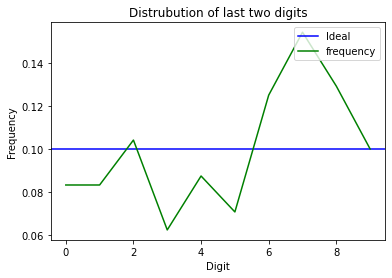

In [7]:
plot_iranian_least_digits_histogram(ones_and_tens_digit_histogram(extract_election_vote_counts('homework6/election-iran-2009.csv', column_names=["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"])))

## Problem 4: Smaller samples have more variation

Write a function called `plot_distribution_by_sample_size`. This function creates 5 different-sized collections of random numbers. Then, it plots the digit histograms for each of those collections. Your function should save your plot as `random-digits.png`.

In [8]:
def random_nbr_lst(size):
    rand_lst = []
    for x in range(size):
        rand_lst.append(random.randint(0, 99))
    return rand_lst
    
def plot_distribution_by_sample_size(samp_size_list):
    color_lst = ['g','r','c','m','y','k','w']
    for i, x in enumerate(samp_size_list):
        plt.plot(ones_and_tens_digit_histogram(pd.Series(random_nbr_lst(x))),
                 color=color_lst[i],
                 label = f'{x} Samples')
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
#     plt.savefig('homework6/iran-digits.png')
    plt.title('Distrubution of last two digits')
    plt.show()

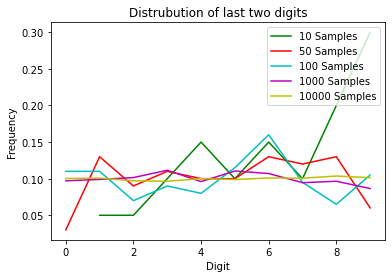

In [9]:
lst_lengths = [10, 50, 100, 1000, 10000]
plot_distribution_by_sample_size(lst_lengths)

# Problem 5: Comparing variation of samples

Write a function mean_squared_error that, given two lists of numbers, computes the mean squared error between the lists.

In [10]:
def mean_squared_error(lst1, lst2):
    return sum(np.subtract(lst1,lst2)**2)

In [11]:
assert mean_squared_error([1, 4, 9], [6, 5, 4]) == 51

# Problem 6: Comparing variation of samples

Augment your program with a function called `calculate_mse_with_uniform` that takes a histogram (as created by ones_and_tens_digit_histogram) and returns the mean squared error of the given histogram with the uniform distribution. Invoking `calculate_mse_with_uniform` with the the Iranian election results histogram (for the ones and tens digits) should return the result 0.00739583333333, or approximately 0.007.

> `calculate_mse_with_uniform(histogram)` == 0.00739583333333

This number on its own does not mean anything — we don't know whether it is unusually low, or unusually high, or about average. To find out, we need to compare it to similarly-sized sets.

In a function called `compare_iranian_mse_to_samples` take the Iranian MSE (as computed by `calculate_mse_with_uniform`) and compare it to the MSE to the uniform distribution for 10000 groups of random numbers, where each group is the same size as the Iranian election data (120 numbers). You will only use the last two digits of the random numbers.

Your function should determine where the passed in MSE (For our sample of the 2009 Iranian election data, this is ~0.007) appears relative to the computed MSE samples. In other words, determine how many of the random MSEs are larger than or equal to the Iran MSE, and how many of the random MSEs are smaller than the Iran MSE. Print these values. This function should return `None`. With each run of your program, you should expect a slightly different outcome from this function call.

> `compare_iranian_mse_to_samples(0.00739583333333)`
- Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: ___
- Quantity of MSEs smaller than the 2009 Iranian election MSE: ___
- 2009 Iranian election null hypothesis rejection level p: ___

In [12]:
def calculate_mse_with_uniform(histogram):
    uniform_distro = [0.1]*len(histogram)
    return mean_squared_error(histogram, uniform_distro)

In [13]:
calculate_mse_with_uniform(ones_and_tens_digit_histogram(extract_election_vote_counts('homework6/election-iran-2009.csv',
                                                                                      column_names=["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"])
                                                        )['frequency'].tolist())

<ipython-input-2-208983a22dea>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vote_cts = pd.Series([])


0.007395833333333335

In [14]:
def compare_iranian_mse_to_samples(histogram, samp_size):
    i_mse = calculate_mse_with_uniform(histogram['frequency'].tolist())
    g_or_e = 0
    l = 0
    for i in range(samp_size):
        histogram = ones_and_tens_digit_histogram(pd.Series(random_nbr_lst(len(histogram))))
        r_mse = calculate_mse_with_uniform(histogram['frequency'].tolist())
        if r_mse < i_mse:
            l += 1
        else:
            g_or_e += 1
    print(f'Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: {g_or_e}')
    print(f'Quantity of MSEs smaller than the 2009 Iranian election MSE: {l}')
    print(f'2009 Iranian election null hypothesis rejection level p: {g_or_e/samp_size}')

In [15]:
compare_iranian_mse_to_samples(ones_and_tens_digit_histogram(extract_election_vote_counts('homework6/election-iran-2009.csv',
                                                                                          column_names=["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"])
                                                            ), 10000)

<ipython-input-2-208983a22dea>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vote_cts = pd.Series([])


Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: 9946
Quantity of MSEs smaller than the 2009 Iranian election MSE: 54
2009 Iranian election null hypothesis rejection level p: 0.9946


# Problem 7: Interpret your results

Interpret your results in answers.txt, using the ideas and vocabulary from the Interpreting Statistical Results section. State whether the data suggest that the Iran election results were tampered with before being reported to the press. Briefly justify your answer.

### Results from Problem 6

- Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: 9946
- Quantity of MSEs smaller than the 2009 Iranian election MSE: 54
- 2009 Iranian election null hypothesis rejection level p: 0.9946

In [16]:
1-0.9946

0.00539999999999996

**Null hypothesis:** the Iran election results are genuine.

Pay attention to the % of MSEs that the Iranian election result is greater than -> We want the quantity of MSEs that were smaller than the Iran election MSE.

The value of 0.007 is larger than 54 of the random MSEs and is smaller than 9946. If the election results were genuine, then there would be a 99.46% chance of this result. This is highly likely are we are only 0.54% confident that the data are fraudulent.

We accept the null hypothesis with a p value of 0.9946. There was only 0.54% confidence that the result was fradulent.